#**Flight Price Prediction Using Machine Learning**

The goal of this project is to predict flight prices based on features like airline, departure city, class, and timing. By doing this, we aim to provide more accurate price estimates, helping travelers plan better and giving airlines insights into their pricing strategies.

**Import All Required Libraries**

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Load Dataset**

In [ ]:
df = pd.read_csv("Flight_Price.csv")
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


**Data Description**

In [ ]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [ ]:
df.isnull().sum()/len(df)*100

,0
Unnamed: 0,0.0
airline,0.0
flight,0.0
source_city,0.0
departure_time,0.0
stops,0.0
arrival_time,0.0
destination_city,0.0
class,0.0
duration,0.0


In [ ]:
df.duplicated().sum()

np.int64(0)

**Data Cleaning**

Dropping Unnecessary columns

In [ ]:
df.drop(columns=["Unnamed: 0", "flight"], inplace=True)


In [ ]:
stops_map = {"zero": 0, "one": 1, "two": 2}
df["stops"] = df["stops"].map(stops_map)


In [ ]:
df.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price'],
      dtype='object')

**EDA**

<Axes: xlabel='price'>

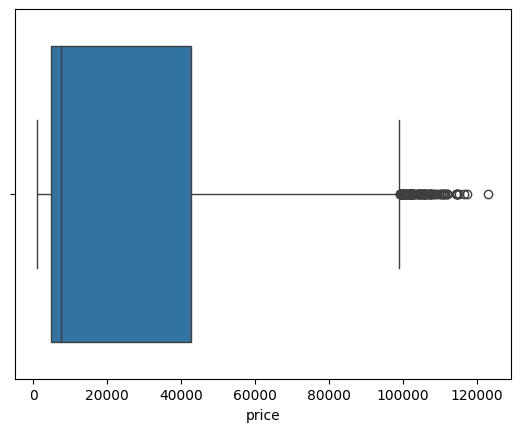

In [ ]:
sns.boxplot(x=df["price"])

Although outliers are present in price, they represent genuine high-cost flights such as business class and last-minute bookings. Therefore, they were retained to preserve real-world price variability.


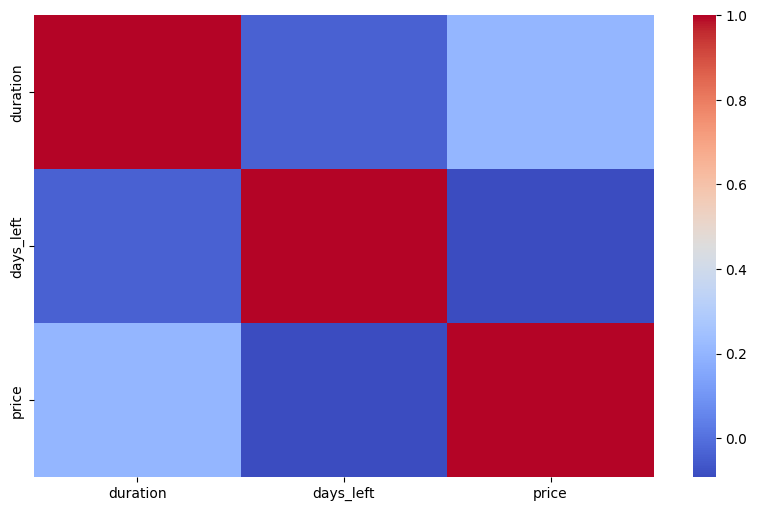

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), cmap="coolwarm")
plt.show()



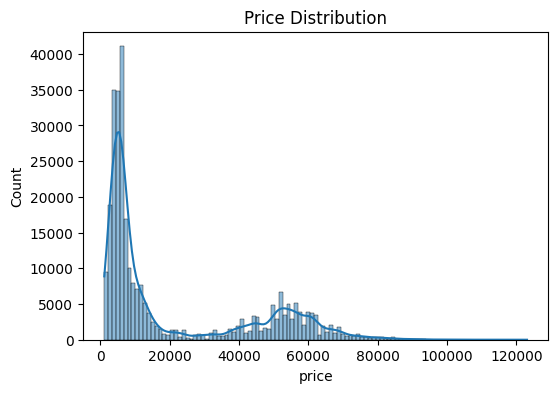

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df["price"], kde=True)
plt.title("Price Distribution")
plt.show()


Most flight tickets are priced on the lower side, but there are a few flights that are much more expensive. This creates a right-skewed distribution, meaning high prices are less common but still important. These expensive tickets are likely due to factors such as business class bookings or premium airlines.

In [ ]:
df['airline'].value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


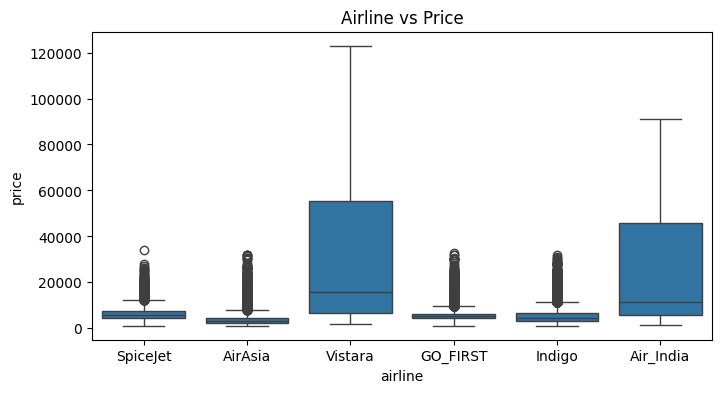

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x="airline", y="price", data=df)
plt.title("Airline vs Price")
plt.show()


Ticket prices differ noticeably between airlines. Full-service airlines like Vistara and Air India generally charge higher fares and show a wider range of prices. In contrast, budget airlines such as IndiGo, SpiceJet, AirAsia, and GO_FIRST tend to offer cheaper and more stable pricing. However, every airline has some expensive tickets, showing that pricing also depends on other factors like demand and timing.

In [ ]:
df['stops'].value_counts()

,count
stops,
1.0,250863
0.0,36004


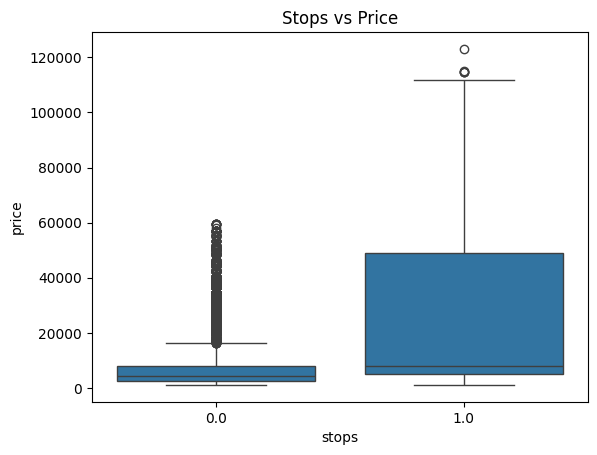

In [ ]:
sns.boxplot(x="stops", y="price", data=df)
plt.title("Stops vs Price")
plt.show()


Flights without stops usually cost less and have more consistent prices. Flights with one stop show much higher price variation and can sometimes be more expensive than direct flights. This indicates that having a stop does not always make a flight cheaper and may increase the price in some cases.

In [ ]:
df['class'].value_counts()

,count
class,
Economy,206666
Business,93487


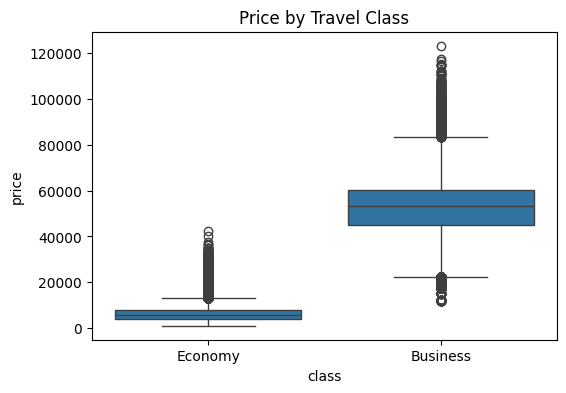

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x="class", y="price", data=df)
plt.title("Price by Travel Class")
plt.show()


Travel class has a very strong impact on ticket prices. Business class tickets are much more expensive than Economy class tickets, with very little overlap between them. Business class prices also vary more, showing that premium services come with a wide range of pricing.

In [ ]:
df['days_left'].value_counts()

,count
days_left,
25,6633
18,6602
39,6593
32,6585
26,6573
24,6542
19,6537
31,6534
33,6532


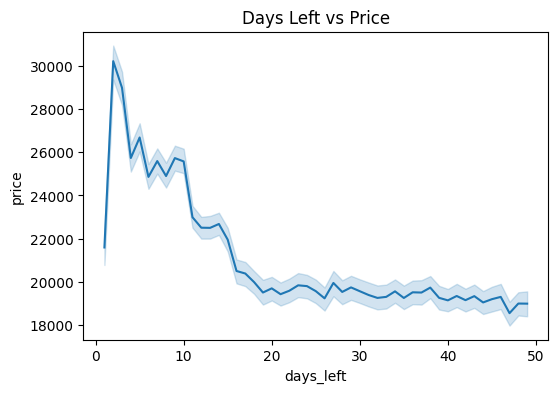

In [ ]:
plt.figure(figsize=(6,4))
sns.lineplot(x="days_left", y="price", data=df)
plt.title("Days Left vs Price")
plt.show()


Ticket prices are highest when flights are booked close to the departure date. As the number of days left increases, prices generally decrease. After a certain point, booking earlier does not reduce the price significantly, suggesting that airlines stabilize prices for early bookings.

In [ ]:
df['duration'].value_counts()

,count
duration,
2.17,4242
2.25,4036
2.75,2879
2.08,2755
2.83,2323
...,...
47.08,1
41.58,1
37.17,1


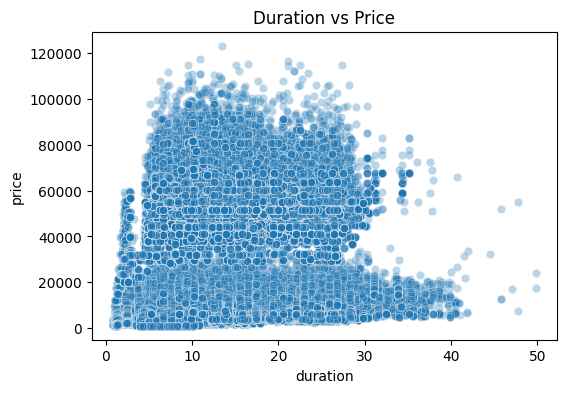

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="duration", y="price", data=df, alpha=0.3)
plt.title("Duration vs Price")
plt.show()


There is no clear relationship between flight duration and ticket price. Both short and long flights can be either cheap or expensive. This shows that flight duration alone does not strongly influence pricing and must be considered along with other features like stops and class.

In [ ]:
df['departure_time'].value_counts()

,count
departure_time,
Morning,71146
Early_Morning,66790
Evening,65102
Night,48015
Afternoon,47794
Late_Night,1306


In [ ]:
df['arrival_time'].value_counts()

,count
arrival_time,
Night,91538
Evening,78323
Morning,62735
Afternoon,38139
Early_Morning,15417
Late_Night,14001


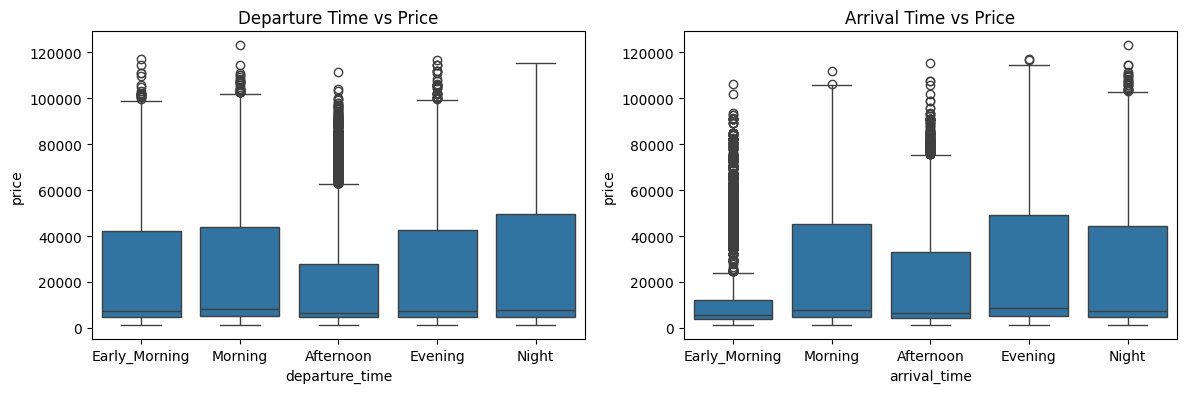

In [ ]:
plt.figure(figsize=(14,4))

# Departure Time vs Price
plt.subplot(1, 2, 1)
time_order = ["Early_Morning", "Morning", "Afternoon", "Evening", "Night"]
sns.boxplot(x="departure_time", y="price", data=df, order=time_order)
plt.title("Departure Time vs Price")

# Arrival Time vs Price
plt.subplot(1, 2, 2)
sns.boxplot(x="arrival_time", y="price", data=df,order=time_order)
plt.title("Arrival Time vs Price")

plt.show()


Departure Time vs Price:

Evening and night departures show slightly higher median prices compared to early morning and afternoon flights. However, all time slots have a wide price range with many high-value outliers. This suggests departure time has some influence, but it is not a strong determining factor of price.

Arrival Time vs Price:

Flights arriving in the evening and at night generally have higher median prices, while early morning arrivals are relatively cheaper. Similar to departure time, there is large price variability within each category. This indicates arrival time affects price moderately, but other factors likely play a bigger role.

In [ ]:
df['source_city'].value_counts()

,count
source_city,
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


In [ ]:
df['destination_city'].value_counts()

,count
destination_city,
Mumbai,59097
Delhi,57360
Bangalore,51068
Kolkata,49534
Hyderabad,42726
Chennai,40368


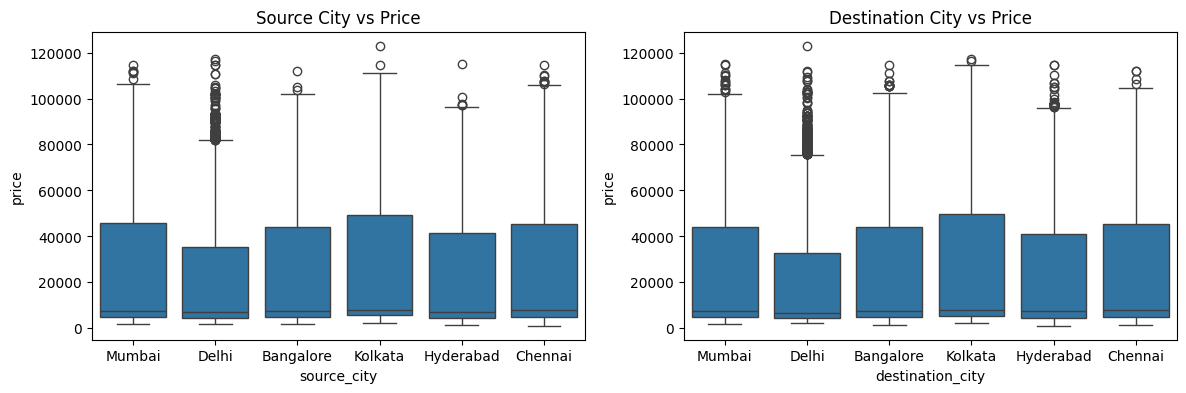

In [ ]:
plt.figure(figsize=(14,4))

city_order = ["Mumbai", "Delhi", "Bangalore", "Kolkata", "Hyderabad","Chennai"]
plt.subplot(1, 2, 1)
sns.boxplot(x="source_city", y="price", data=df,order=city_order)
plt.title("Source City vs Price")

plt.subplot(1, 2, 2)
sns.boxplot(x="destination_city", y="price", data=df,order=city_order)
plt.title("Destination City vs Price")

plt.show()


Source City vs Price:

Prices vary across all source cities, with Kolkata and Chennai showing slightly higher median prices compared to others. Delhi and Hyderabad appear relatively lower. However, the overall variation is large in every city, indicating source city has only a moderate impact on price.

Destination City vs Price:

A similar pattern is observed for destination cities, with Kolkata appearing slightly more expensive on average. All cities show a wide range of prices and several high-value outliers. This suggests destination city influences price to some extent, but it is not the dominant factor.

**Data Preprocessing**

In [ ]:
cat_cols = ['airline', 'source_city', 'departure_time',
            'stops', 'arrival_time', 'destination_city', 'class']

In [ ]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [ ]:
X = df.drop('price', axis=1)
y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Model Selection**

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)




LinearRegression()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor(random_state=42, n_jobs=-1)


**Hyperparameter Tuning**

In [ ]:
rf_params = {"n_estimators": [100, 200],"max_depth": [None, 10, 20],"min_samples_split": [2, 5],"min_samples_leaf": [1, 2]}

In [ ]:
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=rf_params,n_iter=10,cv=3,scoring="r2",n_jobs=-1,random_state=42)

In [ ]:
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200]},
                   random_state=42, scoring='r2')

In [ ]:
best_rf = rf_random.best_estimator_
best_rf

RandomForestRegressor(min_samples_leaf=2, n_estimators=200, n_jobs=-1,
                      random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [ ]:
from sklearn.svm import LinearSVR

svm = LinearSVR(max_iter=3000)
svm.fit(X_train_scaled, y_train)


LinearSVR(max_iter=3000)

In [ ]:
# Linear Regression
lr_pred = lr.predict(X_test_scaled)

# Random Forest (tuned)
rf_pred = best_rf.predict(X_test)

# Gradient Boosting
gbr_pred = gbr.predict(X_test)

# SVM
svm_pred = svm.predict(X_test_scaled)


In [ ]:
lr_pred,rf_pred,gbr_pred,svm_pred

(array([ 4309.51536583, 54986.98797739, 10860.61158827, ...,
         5246.66053226,   508.26900029, 58084.86044063]),
 array([ 7284.66833333, 70197.96133333,  6204.4872381 , ...,
         6849.08089286,  3837.26108333, 71992.71552381]),
 array([ 4829.1853672 , 62670.26596761,  7848.4346556 , ...,
         5303.55925979,  2747.52775703, 66328.18860372]),
 array([ 5097.99375751, 51041.88132415,  7962.05334631, ...,
         5848.97928502,  2271.59486306, 54427.54157541]))

**Model Evaluation**

In [ ]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def model(name, y_test, y_pred):
    print(f"----- {name} -----")
    print("R2 Score :", r2_score(y_test, y_pred))
    print("MAE      :", mean_absolute_error(y_test, y_pred))
    print("RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred)))
    print()

model("Linear Regression", y_test, lr_pred)
model("Random Forest (Tuned)", y_test, rf_pred)
model("Gradient Boosting", y_test, gbr_pred)
model("SVM", y_test, svm_pred)


----- Linear Regression -----
R2 Score : 0.9067772006846496
MAE      : 4549.6858731668935
RMSE     : 6932.149777632591

----- Random Forest (Tuned) -----
R2 Score : 0.9857544853619904
MAE      : 1100.563445015486
RMSE     : 2709.854290134407

----- Gradient Boosting -----
R2 Score : 0.9513130638058416
MAE      : 2976.3293810308605
RMSE     : 5009.715816537646

----- SVM -----
R2 Score : 0.8977767548452611
MAE      : 4259.613251355077
RMSE     : 7259.081954624361



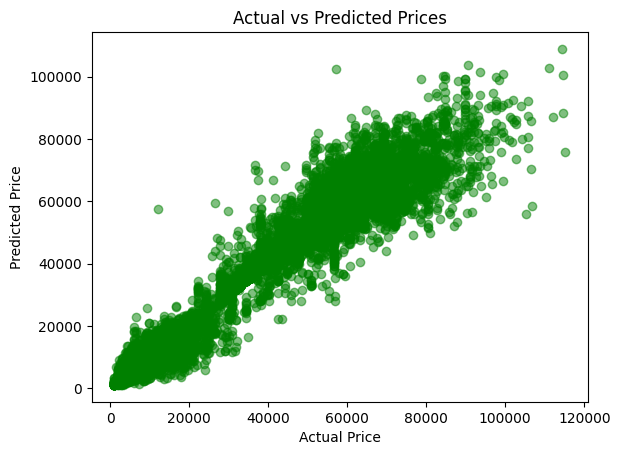

In [ ]:
plt.figure()
plt.scatter(y_test, y_pred_rf, color="green", alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()


In [70]:
import joblib
joblib.dump(best_rf, "flight_price_model.pkl")


['flight_price_model.pkl']

In [71]:
from google.colab import files
files.download("flight_price_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Conclusion**

In this project, we trained and evaluated both Linear Regression and Gradient Boosting models using R², MAE, and RMSE metrics.

Linear Regression achieved an R² score of 0.907, explaining about 90.7% of the variance, but its error metrics (MAE = 4549, RMSE = 6932) indicated larger prediction deviations.

Gradient Boosting, on the other hand, achieved an R² score of 0.951, with significantly lower error values (MAE = 2976, RMSE = 5009). This suggests that Gradient Boosting captured more subtle patterns in the data, delivering more accurate predictions.

Thus, Gradient Boosting is chosen as the final model because of its superior accuracy and reduced prediction errors.